# Intuition Plots

Plots and animations for the key concepts from flows.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

## Key idea: bijections to build up complexity 

Our 1d example.

In [2]:
def gaus(x, mu=0,std=1):
    y = np.exp(-0.5 * ((x-mu)/std)**2)
    y /= 1/(np.sqrt(2*np.pi)*std)
    return y

In [3]:
def sigmoid(x,beta=1):
    return 1/(1+np.exp(-beta * x))

def invSigmoid(x,beta=1):
    return np.log(x/(1-x))/beta
    
def dsigmoid(x,beta=1):
    y = sigmoid(x,beta) 
    
    return y*(1-y)

In [6]:
import matplotlib as mlp
try:
    cmap = mlp.colormaps.get_cmap('magma')
except:
    cmap =mlp.colorbar.cm.magma

In [36]:
betas = [.2,1,5,25]
colors = [cmap(i) for i in np.linspace(0.2,.8,len(betas))]

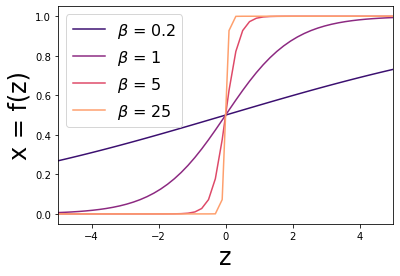

In [55]:
zz = np.linspace(-5,5)



for beta,c in zip(betas,colors):
    plt.plot(zz,sigmoid(zz,beta),color=c,
             label=r'$\beta$ = '+f'{beta}')
    
    plt.legend(fontsize=16)
    plt.xlabel('z',fontsize=24)
    plt.ylabel('x = f(z)',fontsize=24)
    plt.xlim(zz[[0,-1]])
    
    plt.savefig(f'figures/fz_beta{beta}.pdf',bbox_inches='tight')
    
plt.show()

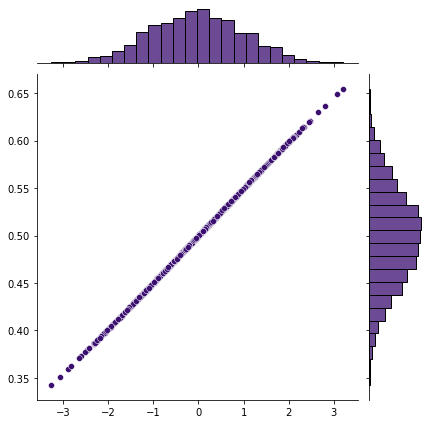

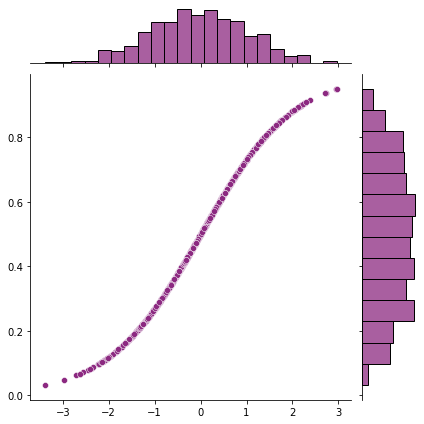

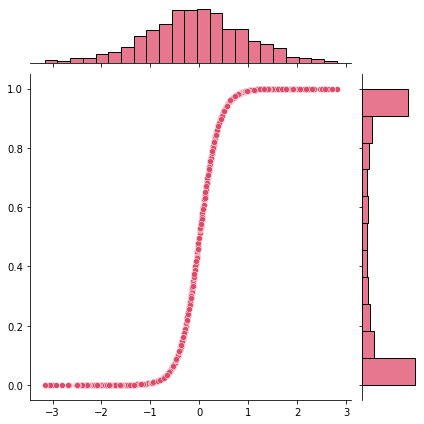

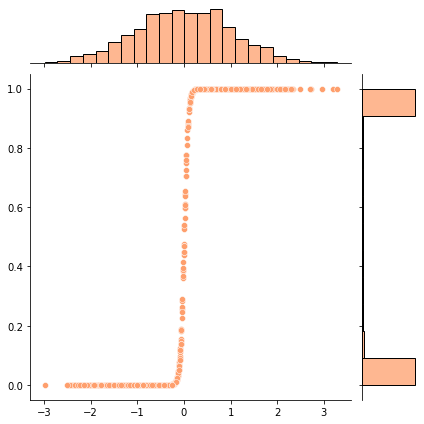

In [57]:
for beta,c in zip(betas,colors):
    
    z = np.random.randn(1000)
    x = sigmoid(z,beta=beta)

    sns.jointplot(x=z,y=x,color=c)
    plt.savefig(f'figures/fz_2d_beta{beta}.pdf',bbox_inches='tight')
    plt.show()
    # break